# Pymaceuticals

In [84]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
drug_df = pd.read_csv(clinical_trial_data_to_load)

drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [85]:
# Combine the data into a single dataset
# Combine with left join-- all rows from drug_df, and the matching keys for "drug" from the mouse_df
combined_df = pd.merge(drug_df,mouse_df,on="Mouse ID",how="left")

# Preview the dataframe
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [86]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data_grouped = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mean_tumor_data = data_grouped.mean()

# Convert to DataFrame, reset_index to change from multi-index
mean_tumor_df = mean_tumor_data.reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [87]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_vol = data_grouped.sem()
# Convert to DataFrame, reset_index to change from multi-index
std_error_df = std_error_vol.reset_index()
# Preview DataFrame
std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [88]:
# Minor Data Munging to Re-Format the Data Frames:

#Set index as timepoint in the mean tumor DataFrame
indexed_timepoint = mean_tumor_df.set_index('Timepoint')

# Pivot/reshape the timepoint indexed, with columns as the drug names, values are the tumor volumes indexed by timepoint
reformat_data = indexed_timepoint.pivot(columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformat_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


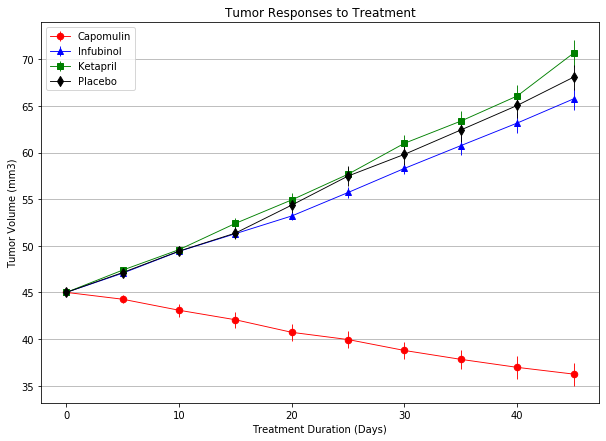

In [89]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))
# Set x-axis to be the timepoint (index of reshaped DataFrame)
x_axis_vol = reformat_data.index.values

'''Create list of the drug names for the drugs of interest, to be used:
# 1. For the legend
# 2. To loop through each drug to plot the tumor volume over time'''
drug_names = ['Capomulin','Infubinol','Ketapril','Placebo']

# Set marker styles for each drug
marker_style = ['ro-','b^-','gs-','kd-']
# Set marker_num = 0, to increase and loop through marker_style for each drug
marker_num=0

# Loop through each drug, plot the average tumor volume, plot the error bars
for name in drug_names:
    marker = marker_style[marker_num]
    marker_num +=1
    y_name = reformat_data[name]
    std_drug = std_error_df[std_error_df['Drug']==name]['Tumor Volume (mm3)']
    plt.errorbar(x_axis_vol, y_name, std_drug, fmt=marker, linewidth=.9,markersize=6.5)

# Add legend, title, x- and y- labels, and grid to plot
plt.legend(drug_names, loc="best")
plt.title('Tumor Responses to Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')

# Save the Figure as tumorResponses.png
plt.savefig("Images/tumorResponses.png")

# Show the figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [90]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
data_grouped_meta = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
mean_meta_data = data_grouped_meta.mean()

# Convert to DataFrame
data_grouped_meta_df = pd.DataFrame(mean_meta_data)

# Preview DataFrame
data_grouped_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [91]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_meta = data_grouped_meta.sem()

# Convert to DataFrame
std_error_meta_df= pd.DataFrame(std_error_meta)

#Change from multi-index
std_error_meta_indexed = std_error_meta.reset_index()

# Preview DataFrame
std_error_meta_indexed.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [92]:
# Minor Data Munging to Re-Format the Data Frames
# Change from multi-index for grouped DataFrame (metastatic sites)
resetIndexed_meta = data_grouped_meta_df.reset_index()

# Set index to Timepoint
indexed_timepoint_meta = resetIndexed_meta.set_index('Timepoint')

# Pivot/Reshape the DataFrame so the columns are the drugs, the values are the average metastatic sites
reformat_data_meta = indexed_timepoint_meta.pivot(columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
reformat_data_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


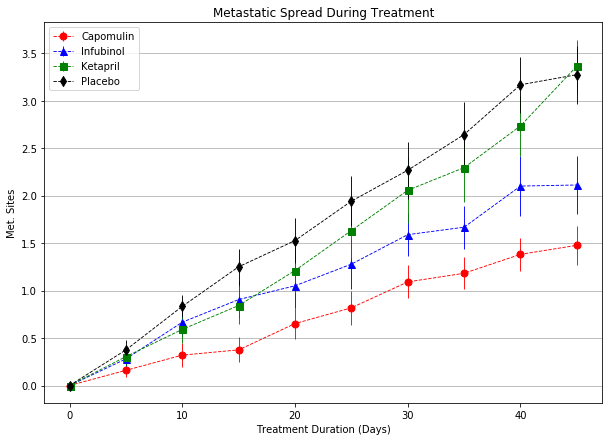

In [93]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))

# Set x-axis to be the timepoint (index of reshaped DataFrame)
x_axis_vol = reformat_data_meta.index.values

'''Create list of the drug names for the drugs of interest, to be used:
# 1. For the legend
# 2. To loop through each drug to plot the average metastatic sites over time'''
drug_names = ['Capomulin','Infubinol','Ketapril','Placebo']

# Set marker styles for each drug
marker_style = ['ro--','b^--','gs--','kd--']

# Set marker_num = 0, to increase and loop through marker_style for each drug
marker_num=0

# Loop through each drug, plot the average metastatic sites, plot the error bars
for name in drug_names:
    marker = marker_style[marker_num]
    marker_num +=1
    y_name = reformat_data_meta[name]
    std_drug = std_error_meta_indexed[std_error_meta_indexed['Drug']==name]['Metastatic Sites']
    plt.errorbar(x_axis_vol,y_name,std_drug,fmt=marker,linewidth=.9,markersize=7)

#Add Legend, title, x and y labels, grid, yticks
plt.legend(drug_names, loc="best")
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(axis='y')
plt.yticks(np.arange(0,4,0.5))

# Save the Figure
plt.savefig("Images/metastaticSpread.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [94]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric):
# Group the combined DataFrame by Drug and Timepoint
grouped_df_survival = combined_df.groupby(['Drug','Timepoint'])

# Count unique values of mice ID to get count of mice
mouse_counts = grouped_df_survival['Mouse ID'].nunique()

# Convert to DataFrame, reset index from multi-index
survival_df = pd.DataFrame(mouse_counts).reset_index()

# Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [95]:
# Minor Data Munging to Re-Format the Data Frames:

# Set index to Timepoint
indexed_timepoint_survival = survival_df.set_index('Timepoint')

# Pivot/Reshape the DataFrame so the columns are the drugs, the values are the mouse counts
reformat_data_survival = indexed_timepoint_survival.pivot(columns='Drug',values='Mouse ID')

# Preview the Data Frame
reformat_data_survival.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


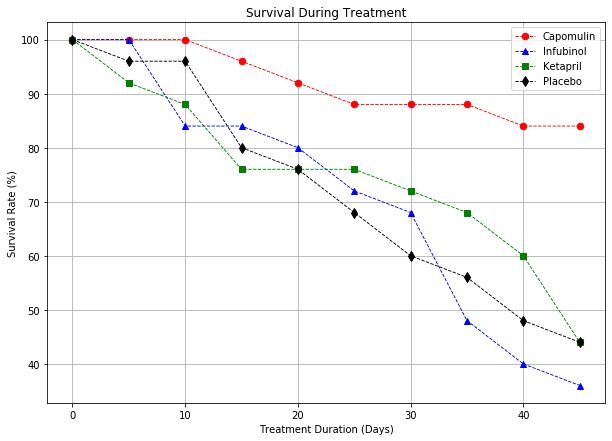

In [96]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,7))

# Set x-axis to be the timepoint (index of reshaped DataFrame)
x_axis_vol = reformat_data_survival.index.values

'''Create list of the drug names for the drugs of interest, to be used:
# 1. For the legend
# 2. To loop through each drug to plot the survival rates over time'''
drug_names = ['Capomulin','Infubinol','Ketapril','Placebo']

# Set marker styles for each drug (red circle, blue triange, green circle, black diamond; set dashed line)
marker_style = ['ro--','b^--','gs--','kd--']

# Set marker_num = 0, to increase and loop through marker_style for each drug
marker_num=0

# Loop through each drug, calculate and plot the survival rates
for name in drug_names:
    marker = marker_style[marker_num]
    marker_num +=1
    
    # Calculate the survival rate = (number alive at timepoint / number alive at time zero)*100
    surv_rate = (reformat_data_survival[name]/reformat_data_survival[name].iloc[0])*100
    
    # Plot the survival rates over each Timepoint
    plt.plot(x_axis_vol,surv_rate,marker,linewidth=.9,markersize=6.5)

# Add legend, title, x- and y- labels, grid
plt.legend(drug_names, loc="best")
plt.title('Survival During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("Images/survivalRate.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [97]:
# Calculate the percent changes for each drug:
# Find the initial and final tumor volumes for each drug
first_vol = reformat_data.iloc[0]
last_vol = reformat_data.iloc[len(reformat_data)-1]

#Calculate the percent change = (final volume-initial volume/initial volume)*100
percent_change = ((last_vol-first_vol)/first_vol)*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

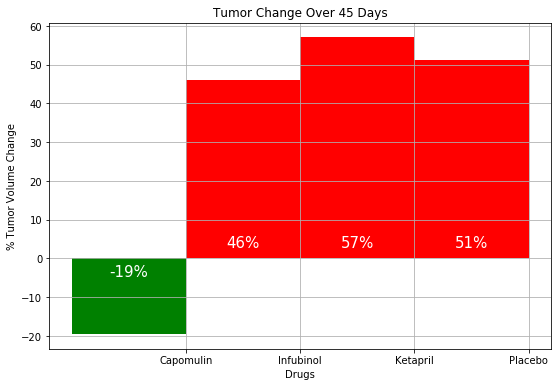

In [104]:
# Store all relevant names into a list
names_perc = ['Capomulin','Infubinol','Ketapril','Placebo']

# Store all Relevant Percent Changes into a Tuple
percent_tuple = (percent_change['Capomulin'],percent_change['Infubinol'],percent_change['Ketapril'],percent_change['Placebo'])

# Splice the data between passing and failing drugs
pass_drugs = []
fail_drugs = []
fail_names = []
pass_names = []
'''Loop through each percent, 
1. If the percent change is less than zero, append the percent change to the failing drugs list, 
    append the corresponding name to the failing drugs names list 
2. If the percent change is greater than zero, append the percent change to the passing drugs list, 
    append the corresponding name to the passing drugs names list     
    '''
for percent in percent_tuple:
    if percent < 0:
        fail_drugs.append(percent)
        index_drug = percent_tuple.index(percent)
        fail_names.append(names_perc[index_drug])
    else:
        pass_drugs.append(percent)
        index_drug = percent_tuple.index(percent)
        pass_names.append(names_perc[index_drug])



fig, ax = plt.subplots(figsize=(9,6))

# Orient width/ Set width to be -1, to align edge on the right side
width = -1

# Add title, x- and y- labels, grid
plt.title('Tumor Change Over 45 Days')
plt.xlabel('Drugs')
plt.ylabel('% Tumor Volume Change')
plt.grid()

# Set rects1 to the bar plot for the failing drugs
rects1 = ax.bar(fail_names, fail_drugs,width, align='edge', color='g')
# Set rects2 to the bar plot for the passing drugs
rects2 = ax.bar(pass_names, pass_drugs,width,align='edge', color='r')

# Use function autolabel() to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        # If the height is negative, put the label for the text on the height plus the y_height/6
        if height <0:
            label_position = height + (y_height/6)
        # If the height is positive, put the label for the text on 2
        elif height > 0:
            label_position = 2
        # Place the text inside the bar's with formatting
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.0f' % int(height) + "%", color='w',fontsize=15,
                ha='center', va='bottom')
        
# Call function autolabel() to implement the function 
autolabel(rects1, ax)
autolabel(rects2, ax)

# Save the Figure
plt.savefig("Images/tumorChange.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

## Observations

As the Tumor Responses to Treatment graph illustrates, Capomulin decreased the average tumor volume over the treatment duration, whereas Infubinol, Ketapril, and Placebo increased the average tumor volume over the treatment. Specifically, Capomulin decreased the average tumor volume from 45 mm3 to 36.2 mm3. Infubinol increased the average tumor volume from 45 to 65 mm3, Ketapril increased the average tumor volume from 45 to 70 mm3, and Placebo increased the average tumor volume 45 to 68 mm3. Thus, Ketapril had the greatest increase in tumor volume and Capomulin had the greatest decrease in tumor volume. Capomulin was the most effective in reducing average tumor volume, whereas Ketapril was the least effective.

As the Metastatic Spread During Treatment graph illustrates, Capomulin also performed the best compared to Infubinol, Ketapril, and Placebo. After the treatment duration of 45 days, Capomulin had an average of 1.47 metastatic sites. Infubinol had an average of 2.11 sites, Ketapril had an average of 3.36 sites, and Placebo had an average of 3.27 sites. Thus, Capomulin is the most effective drug for average metastatic sites and Ketapril is the least effective. 

As the Survival During Treatment graph illustrates, Capomulin preformed the best compared to Infubinol, Ketapril, and Placebo. The survival rate under Capomulin is far higher than the other drugs after the first 10 days. The average survival rate at 45 days under Capomulin is about 84%. The average survival rate at 45 days under Infubinol is 36% and the average survival rate under Ketapril and Placebo is 44%. Thus, after the duration of treatment, Capomulin had the highest survival rate and Infubinol had the lowest survival rate. 

Looking at the Tumor Change Over 45 Days, Capomulin had a negative percent change whereas the others had a positive percent change. Thus, Capomulin preformed the best at decreasing the tumor volume. Ketapril preformed the worst at a 57% increase in tumor volume. This coincides with the conclusions above. Overall, Capomulin outpreformed the other three drugs in average tumor volume, metastatic spread, and survival rate.